In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-1-999ded349815>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [35]:
df= pd.read_csv('Supercapacitor CCD - Lig-NiWO4(1).csv',index_col='cycle') 
df1= pd.read_csv('Supercapacitor CCD - Lig-NiWO4(2) (1).csv',index_col='cycle') 
df2= pd.read_csv('Supercapacitor CCD - Lig-NiWO4(3) (1).csv',index_col='cycle')

In [36]:
df.head()

,lignin,NiWO4,pvdf,csp
cycle,,,,
1,80,10,10,4.104299
2,80,10,10,3.025478
3,80,10,10,2.517516
4,80,10,10,2.265924
5,80,10,10,2.089968


In [37]:
df1.head()

,lignin,NiWO4,pvdf,csp
cycle,,,,
1,45,45,10,8.550955
2,45,45,10,8.558917
3,45,45,10,7.232484
4,45,45,10,5.781051
5,45,45,10,5.005573


In [38]:
df2.head()

,lignin,NiWO4,pvdf,csp
cycle,,,,
1,10,80,10,16.297771
2,10,80,10,13.296178
3,10,80,10,17.078025
4,10,80,10,16.648089
5,10,80,10,14.442675


In [31]:
adf_test(df["csp"])

1. ADF :  -5.497120971107926
2. P-Value :  2.1111861480851484e-06
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 589
5. Critical Values :
	 1% :  -3.4415011513018263
	 5% :  -2.8664595311890215
	 10% :  -2.569389981494346


In [32]:
capacitance=df["csp"]

In [33]:
capacitance.head()

cycle
1    4.104299
2    3.025478
3    2.517516
4    2.265924
5    2.089968
Name: csp, dtype: float64

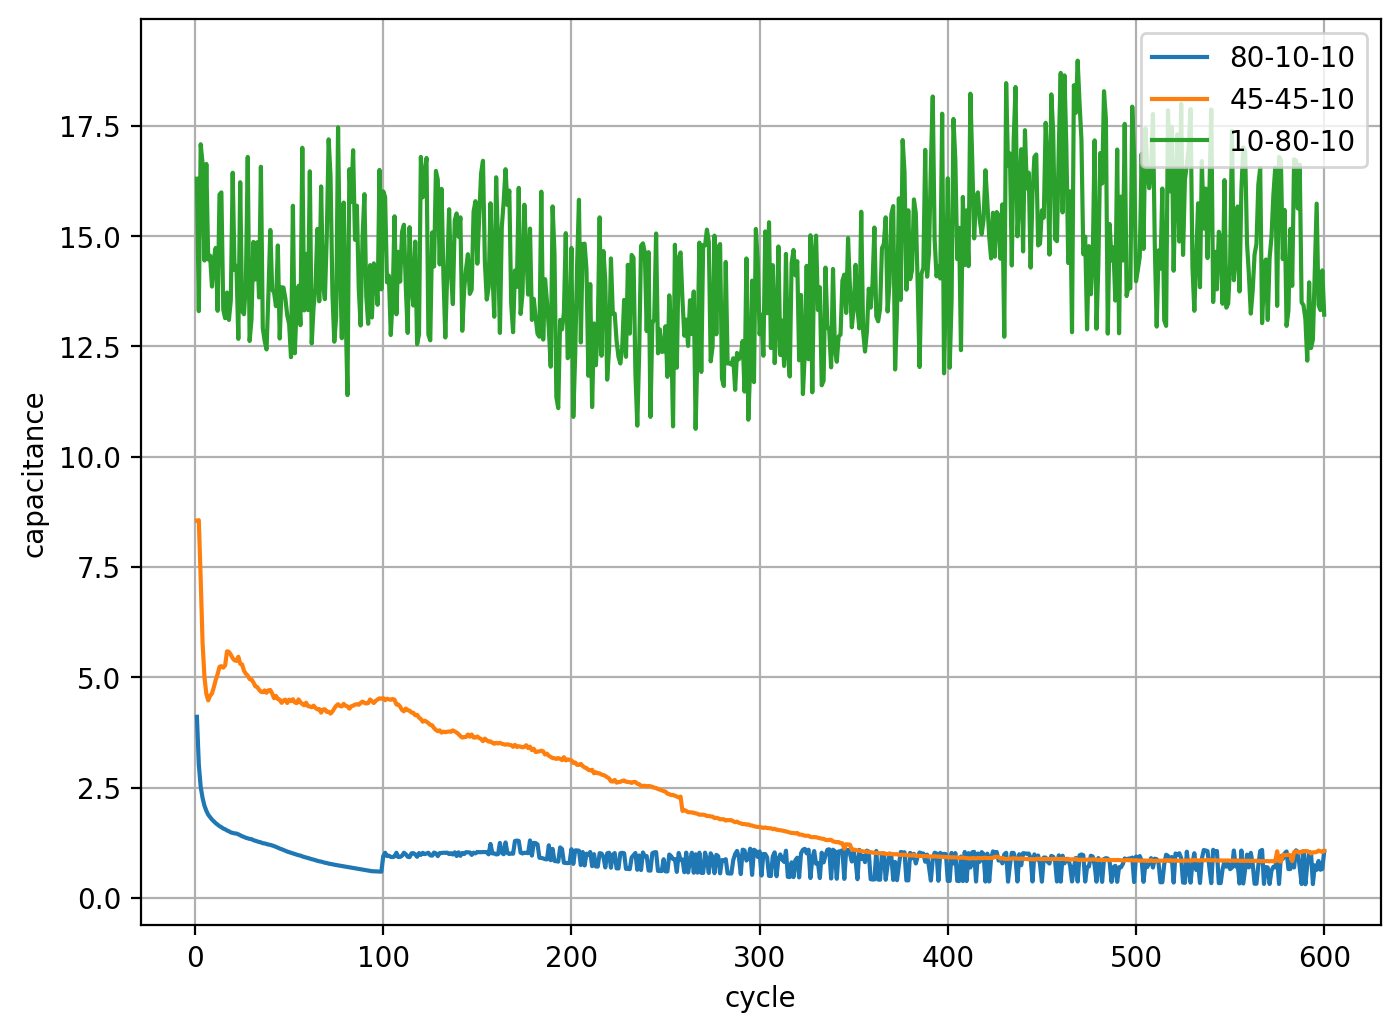

In [49]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=1, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
data1 = plt.plot(df.index,df['csp'],label='80-10-10')
data2 = plt.plot(df1.index,df1['csp'],label='45-45-10')
data3 = plt.plot(df2.index,df2['csp'],label='10-80-10')
plt.legend(['80-10-10', '45-45-10','10-80-10'], loc='upper right')
#plt.legend(['10-80-10'], loc='upper right')
plt.ylabel('capacitance')
plt.xlabel(df.index.name)
plt.grid(True)
plt.show()

In [11]:
stepwise_fit = auto_arima(df['csp'], trace=True,suppress_warnings=True,exogenous = df[['lignin','NiWO4','pvdf']])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1086.738, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.176 seconds


C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\arima.py", line 364, in _fit_wrapper
    arima = sm.tsa.statespace.SARIMAX(
  File "C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\

In [12]:
print(df['csp'].shape)
train=df.iloc[:-50]
test=df.iloc[-50:]
print(train.shape,test.shape)

(600,)
(550, 4) (50, 4)


In [13]:
train.tail()

,lignin,NiWO4,pvdf,csp
cycle,,,,
546,45,45,10,0.845541
547,45,45,10,0.848726
548,45,45,10,0.846338
549,45,45,10,0.849522
550,45,45,10,0.844745


In [14]:
test.head()

,lignin,NiWO4,pvdf,csp
cycle,,,,
551,45,45,10,0.848726
552,45,45,10,0.843949
553,45,45,10,0.843949
554,45,45,10,0.850318
555,45,45,10,0.839968


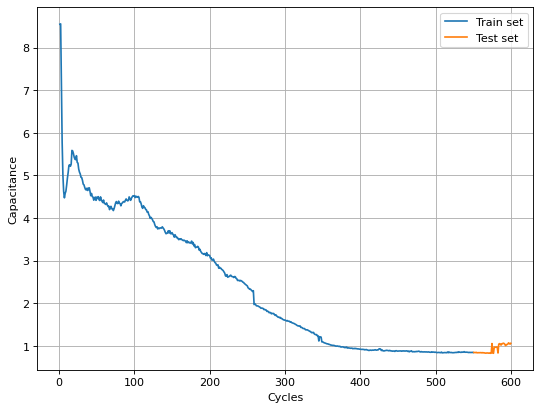

In [15]:
#Plotting the training and test set
figure(num=2, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(train.index,train.csp)
plt.plot(test.index,test.csp)
plt.xlabel('Cycles')
plt.ylabel('Capacitance')
plt.legend(['Train set', 'Test set'], loc='upper right')
plt.grid(True)

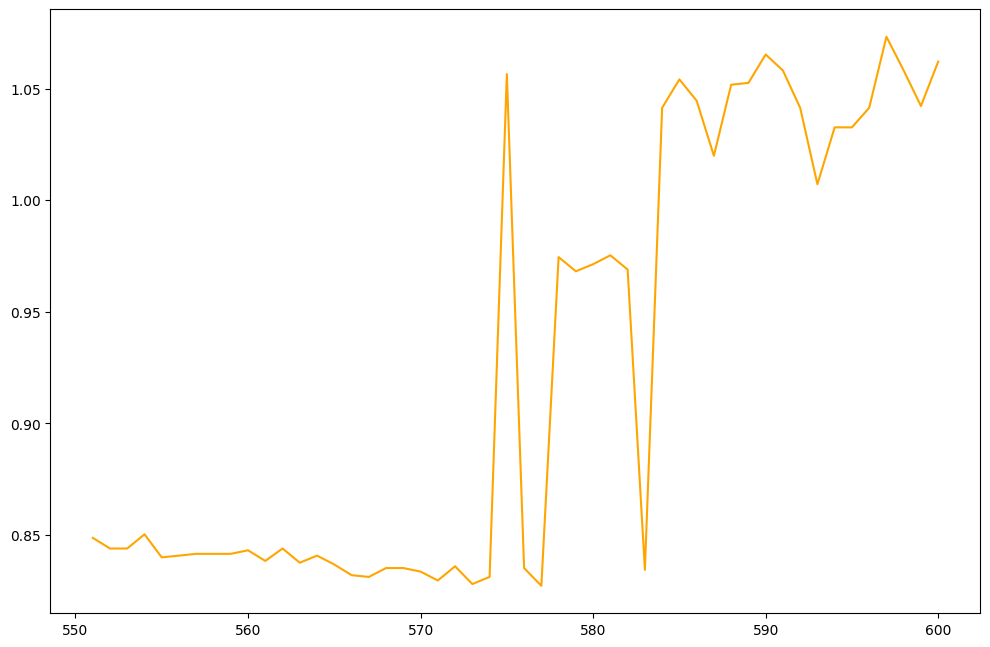

In [16]:
figure(num=3, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
#plt.plot(train.index,train.csp)
plt.plot(test.index,test.csp,color='orange')

In [18]:
model=ARIMA(train['csp'],exog=train[['lignin','NiWO4','pvdf']],order=(0,2,2))
model=model.fit()
model.summary()

C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    csp   No. Observations:                  550
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 601.976
Date:                Mon, 15 Feb 2021   AIC                          -1191.952
Time:                        14:32:35   BIC                          -1166.115
Sample:                             0   HQIC                         -1181.854
                                - 550                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lignin      9.946e-08   4.57e-10    217.811      0.000    9.86e-08       1e-07
NiWO4       9.946e-08   4.57e-10    217.811      0.000    9.86e-08       1e-07
pvdf        2.196e-08   1.01e-10    216.386      0.000    2.18e-08    2.22e-08
ma.L1         -0.3716      0.015    -24.289      0.000      -0.402      -0.342
ma.L2         -0.3923      0.019    -20.919      0.000      -0.429      -0.356
sigma2         0.0065   8.15e-05     79.753      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   7.87   Jarque-Bera (JB):            178157.40
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -4.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        90.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+24. Standard errors may be unstable.
"""

C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='cycle'>

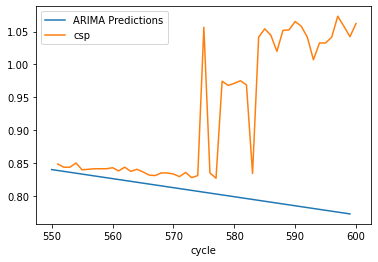

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,exog=test[['lignin','NiWO4','pvdf']],typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['csp'].plot(legend=True)

In [22]:
pred.shape

(50,)

In [24]:
pred=model.predict(start=0,end=549,typ='levels',exog=test[['lignin','NiWO4','pvdf']]).rename('ARIMA Predictions')
figure(num=3, figsize=(16, 9), dpi=1200, facecolor='w', edgecolor='k')
plt.plot(train.index,pred.values,color='red')
plt.plot(train.index,train.csp,linewidth=1.5)
plt.xlabel('Cycles')
plt.ylabel('Capacitance')
plt.legend(['Prediction', 'Data'], loc='upper right')
plt.grid(True)

In [25]:
train['csp'].mean()


2.401561957161634

In [26]:
rmse=sqrt(mean_squared_error(pred,train['csp']))
print(rmse)

0.41637226794047266
